<a href="https://colab.research.google.com/github/sidds4474/Play-Store-App-Review-Analysis/blob/main/Play_Store_App_Review_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
import pandas as pd

In [13]:
# Function to read data from google drive

def read_data(filename):
  data=pd.read_csv(filename)
  return data

In [17]:
filename = '/content/drive/MyDrive/Play Store App Review Analysis - Capstone Project/Play Store Data.csv'
data=read_data(filename)
data.head(-5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10832,FR Tides,WEATHER,3.8,1195,582k,"100,000+",Free,0,Everyone,Weather,"February 16, 2014",6.0,2.1 and up
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,619k,"1,000+",Free,0,Everyone,Books & Reference,"March 23, 2014",0.8,2.2 and up
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up


In [10]:
def get_stats(data):
  print('\n')
  print(data.info())
  print('\n')
  print('Shape of dataFrame is {} \n'.format(data.shape))
  print('\n')
  print('Missing Values are:\n')
  print(data.isnull().sum())
  print('\n')
  print('Data Types of feature are: \n')
  print(data.dtypes)


In [18]:
get_stats(data)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB
None


Shape of dataFrame is (10841, 13) 



Missing Values are:

App                  0
Category             0
Rating            1474
Reviews              0
Siz

In [19]:
data[data['Rating']>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [20]:
data.iloc[10472,1:]=data.iloc[10472,1:].shift(1)

In [21]:
data.iloc[10472,:]

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              NaN
Rating                                                1.9
Reviews                                              19.0
Size                                                 3.0M
Installs                                           1,000+
Type                                                 Free
Price                                                   0
Content Rating                                   Everyone
Genres                                                NaN
Last Updated                            February 11, 2018
Current Ver                                        1.0.19
Android Ver                                    4.0 and up
Name: 10472, dtype: object

In [22]:
data['Last Updated']=pd.to_datetime(data['Last Updated'])
data['Last Updated'].dtype

dtype('<M8[ns]')

In [23]:
data['Year Added']=data['Last Updated'].dt.year
data['Month Added']=data['Last Updated'].dt.month

In [24]:
data.head(-5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Year Added,Month Added
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,2018,1
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,2018,1
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,2018,8
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,2018,6
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,2018,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,2018-06-13,2.0.148.0,4.0 and up,2018,6
10832,FR Tides,WEATHER,3.8,1195,582k,"100,000+",Free,0,Everyone,Weather,2014-02-16,6.0,2.1 and up,2014,2
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,619k,"1,000+",Free,0,Everyone,Books & Reference,2014-03-23,0.8,2.2 and up,2014,3
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,2017-06-18,1.0.0,4.1 and up,2017,6


In [25]:
# Type of service people like to use Free or Paid ?
data['Type'].isna().sum()


1

In [26]:
data.dropna(subset=['Type'],inplace=True)

In [28]:
data['Type'].isna().sum()

0

In [27]:
data['Type'].unique()

array(['Free', 'Paid'], dtype=object)

In [29]:
labels=data['Type'].value_counts().index
values=data['Type'].value_counts().values

In [30]:
!pip install plotly

In [31]:
import plotly.express as px

In [32]:
px.pie(names=labels,values=values)

In [33]:
df1=data[data['Type']=='Free']
df2=data[data['Type']=='Paid']

In [34]:
free=df1['Year Added'].value_counts().reset_index()
free

,index,Year Added
0,2018,7004
1,2017,1684
2,2016,710
3,2015,377
4,2014,150
5,2013,81
6,2012,21
7,2011,12
8,2010,1


In [35]:
free.columns=['year','count']
free

,year,count
0,2018,7004
1,2017,1684
2,2016,710
3,2015,377
4,2014,150
5,2013,81
6,2012,21
7,2011,12
8,2010,1


In [36]:
paid=df2['Year Added'].value_counts().reset_index()

In [37]:
paid.columns=['year','count']
paid

,year,count
0,2018,345
1,2017,183
2,2016,94
3,2015,82
4,2014,59
5,2013,29
6,2012,5
7,2011,3


In [38]:
row={'year':2010,'count':0}
paid=paid.append(row,ignore_index=True)
paid

,year,count
0,2018,345
1,2017,183
2,2016,94
3,2015,82
4,2014,59
5,2013,29
6,2012,5
7,2011,3
8,2010,0


In [39]:
!pip install chart_studio

     |████████████████████████████████| 64 kB 1.8 MB/s 
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11447 sha256=88617ef4c186656771d5abdda14b4c7af0f3af02218249179c58ec94ffed6076
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying


In [95]:
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import plotly.express as px
import chart_studio.plotly as py
import numpy as np
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)

In [96]:
y=[trace1,trace2]

In [97]:
fig=go.Figure(data=y)
fig.show(renderer="colab")

In [61]:
def stats(dataframe,feature,column1,column2):
  df=dataframe[feature].value_counts().reset_index()
  df.columns=[column1,column2]
  return df

In [62]:
stats(df1,'Year Added','year','count')

,year,count
0,2018,7004
1,2017,1684
2,2016,710
3,2015,377
4,2014,150
5,2013,81
6,2012,21
7,2011,12
8,2010,1


In [87]:
def need_visual(df1=None,df2=None,column1=None,column2=None,dict_title=None,visual='scatter'):
  if visual=='scatter':
    trace1=go.Scatter(x=df1[column1],y=df1[column2])
    trace2=go.Scatter(x=df2[column1],y=df2[column2])
    y=[trace1,trace2]
    layout=dict_title
    fig=go.Figure(data=y,layout=layout)
    return fig.show(renderer="colab")

  elif visual=='bar': 
    fig=px.bar(df1,x=column1,y=column2) 
    return fig.show(renderer="colab")

In [64]:
free=stats(df1,'Year Added','year','count')
free

,year,count
0,2018,7004
1,2017,1684
2,2016,710
3,2015,377
4,2014,150
5,2013,81
6,2012,21
7,2011,12
8,2010,1


In [65]:
paid=stats(df2,'Year Added','year','count')
paid

,year,count
0,2018,345
1,2017,183
2,2016,94
3,2015,82
4,2014,59
5,2013,29
6,2012,5
7,2011,3


In [66]:
row={'year':2010,'count':0}

In [67]:
paid=paid.append(row,ignore_index=True)
paid

,year,count
0,2018,345
1,2017,183
2,2016,94
3,2015,82
4,2014,59
5,2013,29
6,2012,5
7,2011,3
8,2010,0


In [88]:
need_visual(free,paid,'year','count')

In [75]:
df1.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Year Added', 'Month Added'],
      dtype='object')

In [76]:
output=stats(df1,'Month Added','month','count')

In [86]:
need_visual(df1=output,column1='month',column2='count',visual='bar')

In [78]:
# Google is bias or not
output3=stats(df1,'Content Rating','users','count')
output4=stats(df2,'Content Rating','users','count')

In [89]:
need_visual(output3,output4,'users','count')

In [ ]:
df1.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Year Added', 'Month Added'],
      dtype='object')

In [ ]:
df1['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4.0, nan, 4.8,
       4.9, 3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5.0, 3.0, 1.9, 2.5, 2.8, 2.7,
       1.0, 2.9, 2.3, 2.6, 2.2, 1.7, 2.0, 2.4, 1.8, 1.6, 2.1, 1.4, 1.5,
       1.2, '1.9'], dtype=object)

In [ ]:
df1['Rating'].replace('1.9',1.9,inplace=True)

In [ ]:
df1['Rating'].dtype

dtype('float64')

In [ ]:
df1['Rating'].unique()


array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , nan, 4.8,
       4.9, 3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 3. , 1.9, 2.5, 2.8, 2.7,
       1. , 2.9, 2.3, 2.6, 2.2, 1.7, 2. , 2.4, 1.8, 1.6, 2.1, 1.4, 1.5,
       1.2])

In [ ]:
df1['Rating'].isna().sum()

1320

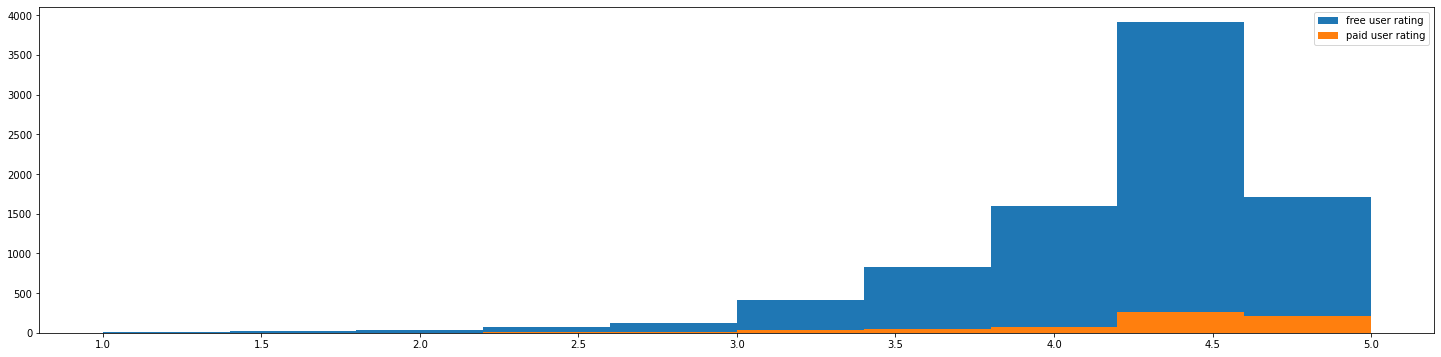

In [ ]:
plt.hist(df1['Rating'].dropna(),label='free user rating')
plt.hist(df2['Rating'].dropna(),label='paid user rating')
plt.legend()

In [ ]:
df1['Category'].unique()
#stats(df1,'Category').unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION', nan],
      dtype=object)

In [ ]:
free_cat=stats(df1,'Category','categories','count')
free_cat

,categories,count
0,FAMILY,1780
1,GAME,1061
2,TOOLS,765
3,BUSINESS,446
4,PRODUCTIVITY,396
5,LIFESTYLE,363
6,COMMUNICATION,360
7,SPORTS,360
8,MEDICAL,354
9,FINANCE,349


In [ ]:
paid_cat=stats(df2,'Category','categories','count')
paid_cat

,categories,count
0,FAMILY,191
1,MEDICAL,109
2,GAME,83
3,PERSONALIZATION,83
4,TOOLS,78
5,PRODUCTIVITY,28
6,BOOKS_AND_REFERENCE,28
7,COMMUNICATION,27
8,SPORTS,24
9,PHOTOGRAPHY,22


In [ ]:
#need_visual(free_cat,paid_cat,'categories','count')
#plt.hist(df1['Rating'].dropna(),label='free user rating')
#plt.stackplot
#list1=df1['Category'].unique()
print(list)
list2=df1['Category'].value_counts()
print(list2)

FAMILY                 1780
GAME                   1061
TOOLS                   765
BUSINESS                446
PRODUCTIVITY            396
LIFESTYLE               363
COMMUNICATION           360
SPORTS                  360
MEDICAL                 354
FINANCE                 349
HEALTH_AND_FITNESS      325
PHOTOGRAPHY             313
PERSONALIZATION         309
SOCIAL                  292
NEWS_AND_MAGAZINES      281
SHOPPING                258
TRAVEL_AND_LOCAL        246
DATING                  227
BOOKS_AND_REFERENCE     203
VIDEO_PLAYERS           171
EDUCATION               152
ENTERTAINMENT           147
MAPS_AND_NAVIGATION     132
FOOD_AND_DRINK          125
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       84
AUTO_AND_VEHICLES        82
WEATHER                  74
EVENTS                   63
ART_AND_DESIGN           62
COMICS                   60
PARENTING                58
BEAUTY                   53
Name: Category, dtype: int64


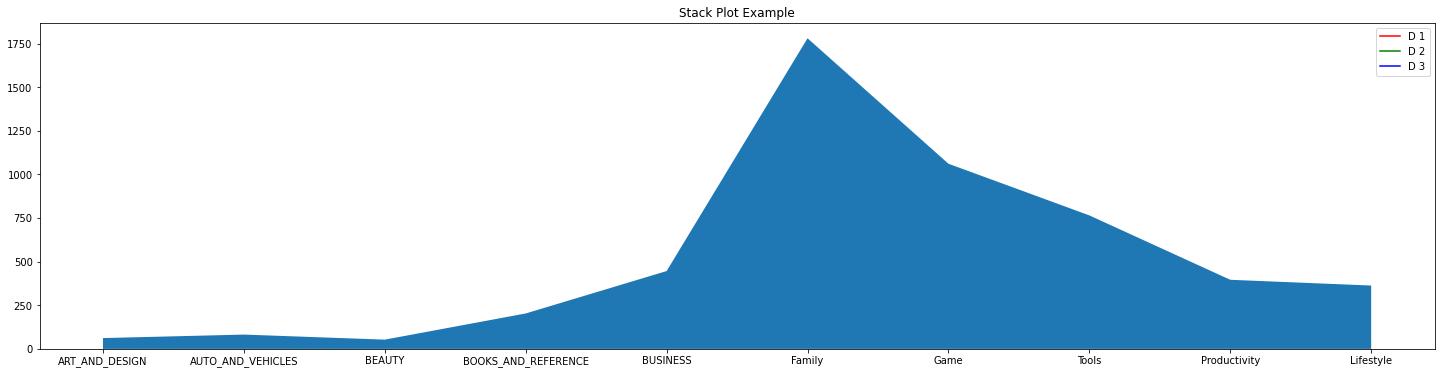

In [ ]:
import matplotlib.pyplot as plt

idxes = ['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'Family','Game','Tools','Productivity','Lifestyle']
arr1  = [62, 82, 53, 203, 446, 1780, 1061, 765, 396, 363]

# Adding legend for stack plots is tricky.
plt.plot([], [], color='r', label = 'D 1')
plt.plot([], [], color='g', label = 'D 2')
plt.plot([], [], color='b', label = 'D 3')

plt.stackplot(idxes, arr1)
plt.title('Stack Plot Example')
plt.legend()
plt.show()